# Document Classifier with word vector

### Load Libraries

In [1]:
"""
Data Science Homework 5 
written by Kim Hoyeob with ID 2014150440
"""


import bs4
import urllib.request
import nltk
import math
import operator # use to sort dictionary
import numpy as np
import matplotlib.pyplot as plt

### Environment Setting

In [2]:
# stopword setting
stpwrds = nltk.corpus.stopwords.words('english')
stpwrds = stpwrds + [',','.',"''",'``',"\"\"","'","\"",'?','!','@','#','$','%','&',"'s", '(',')','-','--','|','||', ':',"n't"]

# importing stemming method
poter = nltk.stem.porter.PorterStemmer()


# Parsing and preprocessing function
def cnn_parsing(link_str):
    ### Parsing
    htmlData = urllib.request.urlopen(link_str)
    bs = bs4.BeautifulSoup(htmlData, 'lxml')  

    #TODO : 머리말 찾아내서 bodis에 붙이는 작업
    head = bs.findAll('div','el__leafmedia el__leafmedia--sourced-paragraph')
    bodies = bs.findAll('div', 'zn-body__paragraph') 
    bodies = head + bodies


    ### Preprocessing

    # text만 가져오기
    text = ''
    for body in bodies :
        text += body.getText()

    # 소문자로 변경
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Stopword 제거
    tokens = [k for k in tokens if k not in stpwrds]
    
    # 숫자제거
    tokens = [k for k in tokens if not k.isdigit()]

    # Stemming 
    for l in tokens :
        l = poter.stem(l)
    
    return tokens
        

# 문서와 기준 단어리스트 입력시 단어 빈도수 벡터 반환하는 함수
def doc2vec(doc,std_list):
    std_freq = nltk.FreqDist(doc)
    list_return = []
    for idx in std_list:
        list_return.append(std_freq[idx])
    return list_return

# 두 벡터의 코사인 각도 구하는 함수
def sim(v1,v2):
    v1 = np.array(v1); v2 = np.array(v2)
    multi = (v1.dot(v2)).sum()
    x = math.sqrt((v1*v1).sum())
    y = math.sqrt((v2*v2).sum())
    return multi/(x*y)

### Importing training Links

In [3]:
# 각 주제의 link를 link_dic에 불러오기

golff = open('./train_doc/golf_20.txt')
entertainmentf =  open('./train_doc/entertainment_20.txt')
politicsf =  open('./train_doc/politics_20.txt')

golf_list = [] ; entertainment_list = []; politics_list = []
while True :
    line = golff.readline()
    if len(line) <= 0 : 
        link_dic = {'golf' : golf_list}
        break
    golf_list.append(line)
    
while True :
    line = entertainmentf.readline()
    if len(line) <= 0 : 
        link_dic.update({'entertainment' : entertainment_list})
        break
    entertainment_list.append(line)
    
while True :
    line = politicsf.readline()
    if len(line) <= 0 : 
        link_dic.update({'politics' : politics_list})
        break
    politics_list.append(line)

print(golf_list, entertainment_list,politics_list)

['http://edition.cnn.com/2017/03/02/golf/tiger-woods-masters-1997-injury/index.html\n', 'http://edition.cnn.com/2015/11/06/golf/golf-initiative-final-write/index.html\n', 'http://edition.cnn.com/2017/03/01/golf/tiger-woods-dad-caddyshack-oatmeal/index.html\n', 'http://edition.cnn.com/2017/02/27/golf/tiger-woods-injury-living-golf/\n', 'http://edition.cnn.com/2017/03/16/golf/rory-mcilroy-muirfield-golf-club-women-members-obscene/index.html\n', 'http://edition.cnn.com/2017/03/03/golf/tiger-woods-best-shot-hazeltine-living-golf-dubai/index.html\n', 'http://edition.cnn.com/2017/01/26/golf/jason-day-perfect-day-living-golf-australia/index.html\n', 'http://edition.cnn.com/2017/03/14/golf/muirfield-golf-club-women-members/index.html\n', 'http://edition.cnn.com/2017/03/10/golf/tiger-woods-arnold-palmer-invitational-back-injury/index.html\n', 'http://edition.cnn.com/2017/02/27/golf/tiger-woods-injury-living-golf/index.html\n', 'http://edition.cnn.com/2017/02/01/golf/tiger-woods-dubai-desert-cla

### Parsing and Preprocessing

In [4]:
golf_list = [] ; entertainment_list = []; politics_list = []

for i in link_dic.keys(): # i : golf, entertainment, politics
    for j in link_dic[i]: # j : 각 주제에 맞는 링크 string
        
        # Parsing and preprocessing
        tokens = cnn_parsing(j)        
        
        # 각 리스트에 말뭉치 리스트 할당
        
        if i == 'golf':
            golf_list.append(tokens)
        elif i == 'entertainment':
            entertainment_list.append(tokens)
        elif i == 'politics':
            politics_list.append(tokens)
        else : pass
        
print(golf_list, entertainment_list,politics_list)

[['cnn', 'twenty', 'years', 'ago', 'sparked', 'era', 'would', 'change', 'golf', 'forever', 'advice', 'would', 'tiger', 'woods', 'give', '21-year-old', 'self', "'d", 'say', 'patient', 'scheduling', 'much', 'woods', 'told', 'cnn', 'shane', "o'donoghue", 'exclusive', 'interview', 'living', 'golf', 'ahead', 'dubai', 'desert', 'classic.much', 'happened', 'woods', 'since', 'maiden', 'major', 'masters.records', 'tumbled', 'majors', 'piled', 'scandal', 'injury', 'took', 'toll.yet', 'attempts', 'rebuild', 'career', 'former', 'long-time', 'world', 'sidelined', 'back', 'problems', 'missing', 'months', 'following', 'multiple', 'back', 'surgeries', '[', 'get', ']', 'different', 'hobbies', 'get', 'away', 'game', 'life', 'balance', '41-year-old', 'woods', 'added', 'continued', 'reflect', 'think', 'important', 'age', 'gapwoods', 'latest', 'comeback', 'stalled', 'withdrew', 'last', 'month', 'tournament', 'dubai', 'second', 'round', 'citing', 'back', 'spasms', 'played', 'since', 'canceled', 'news', 'con

### VECTORIZATION

In [5]:
## extract words to make a standard vector
## 각 주제에서 겹치지 않는 최빈단어 추출해 벡터로 구성하기

# 주제별로 전체 단어 한 리스트로 합치기
golf_sum = []; entertainment_sum = []; politics_sum=[]
for i in range(20):
    golf_sum = golf_sum + golf_list[i]
    entertainment_sum = entertainment_sum + entertainment_list[i]
    politics_sum = politics_sum + politics_list[i]

# 주제별 최빈 N개 단어 추출하기
golf_sum = nltk.FreqDist(golf_sum)
golf_sum = sorted(golf_sum.items(), key=operator.itemgetter(1))[:]
entertainment_sum = nltk.FreqDist(entertainment_sum)
entertainment_sum = sorted(entertainment_sum.items(), key=operator.itemgetter(1))[:]
politics_sum = nltk.FreqDist(politics_sum)
politics_sum = sorted(politics_sum.items(), key=operator.itemgetter(1))[:]

# 주제별 분류완료된 단어들을 리스트로 변환
golf_words =[]; entertainment_words=[]; politics_words=[]
for i in range(len(golf_sum)):
    golf_words.append(golf_sum[i][0])
for i in range(len(entertainment_sum)):
    entertainment_words.append(entertainment_sum[i][0])
for i in range(len(politics_sum)):
    politics_words.append(politics_sum[i][0])

# 다른 주제와 중복되는 단어 제거
golf_word = [k for k in golf_words if k not in (politics_words+entertainment_words)]
entertainment_word = [k for k in entertainment_words if k not in (politics_words+golf_words)]
politics_word = [k for k in politics_words if k not in (golf_words+entertainment_words)]

# 기준 벡터 생성
vector_words = set(golf_words + entertainment_words + politics_words)  # 주제별 중복단어 포함, 실제 사용
#vector_words1 = golf_word + entertainment_word + politics_word  # 주제별 중복단어 제거


# array 생성해 각 행별로 문서 벡터화
for i in range(len(golf_list)):
    if i == 0:
        golf_array = np.array([doc2vec(golf_list[i],vector_words)])
        entertainment_array = np.array([doc2vec(entertainment_list[i],vector_words)])
        politics_array = np.array([doc2vec(politics_list[i],vector_words)])
    else :
        golf_array = np.append(golf_array,[doc2vec(golf_list[i],vector_words)], axis = 0)
        entertainment_array = np.append(entertainment_array,[doc2vec(entertainment_list[i],vector_words)], axis = 0)
        politics_array = np.append(politics_array,[doc2vec(politics_list[i],vector_words)], axis = 0)

# 문서별 평균벡터 추출
golf_class = golf_array.mean(axis=0)
entertainment_class = entertainment_array.mean(axis=0)
politics_class = politics_array.mean(axis=0)

print(golf_class, entertainment_class, politics_class)

[ 0.    0.    0.05 ...,  0.    0.    0.  ] [ 0.  0.  0. ...,  0.  0.  0.] [ 0.1   0.05  0.   ...,  0.05  0.05  0.05]


### CLASSIFICATION

In [6]:
# Load Test Data
doc1 = cnn_parsing('http://edition.cnn.com/2017/03/16/entertainment/emma-watson-photos-stolen/index.html')
doc2 = cnn_parsing('http://edition.cnn.com/2017/03/17/politics/andrew-wheeler-epa-trump-consideration/index.html')
doc3 = cnn_parsing('http://edition.cnn.com/2015/06/08/golf/tiger-woods-golf-reaction/index.html')

# Vetorize test data
doc1_vec = doc2vec(doc1, vector_words)
doc2_vec = doc2vec(doc2, vector_words)
doc3_vec = doc2vec(doc3, vector_words)


# 벡터와 비교 및 출력
class_list = ['golf' , 'entertainment', 'politics']

result = np.array([[sim(doc1_vec, golf_class),sim(doc2_vec, golf_class),sim(doc3_vec, golf_class)],
        [sim(doc1_vec, entertainment_class),sim(doc2_vec, entertainment_class),sim(doc3_vec, entertainment_class)],
        [sim(doc1_vec, politics_class),sim(doc2_vec, politics_class),sim(doc3_vec, politics_class)]])

arg_max = np.argmax(result, axis = 0)

for i in range(3):
    print ("Document %d is classifed to %s with cosine similarity %f"%(i+1, class_list[arg_max[i]],result[arg_max[i],i]))


Document 1 is classifed to entertainment with cosine similarity 0.219919
Document 2 is classifed to politics with cosine similarity 0.224005
Document 3 is classifed to golf with cosine similarity 0.586002


### VISUALIZING

In [7]:
# 주제별 단어빈도순으로 정렬된 리스트 호출

golf_top10 = golf_sum[-10:]
entertainment_top10 = entertainment_sum[-10:]
politics_top10 = politics_sum[-10:]

# 리스트 내 튜플로 저장되어 있어 각각 그래프 그리기 쉬운 리스트 형태로 전환
golf_value = [];golf_label =[]; entertainment_value = []; entertainment_label =[]; politics_value=[]; politics_label=[]
for i in range(10):
    golf_label.append(golf_top10[i][0])
    golf_value.append(golf_top10[i][1])
    entertainment_label.append(entertainment_top10[i][0])
    entertainment_value.append(entertainment_top10[i][1])
    politics_label.append(politics_top10[i][0])
    politics_value.append(politics_top10[i][1])

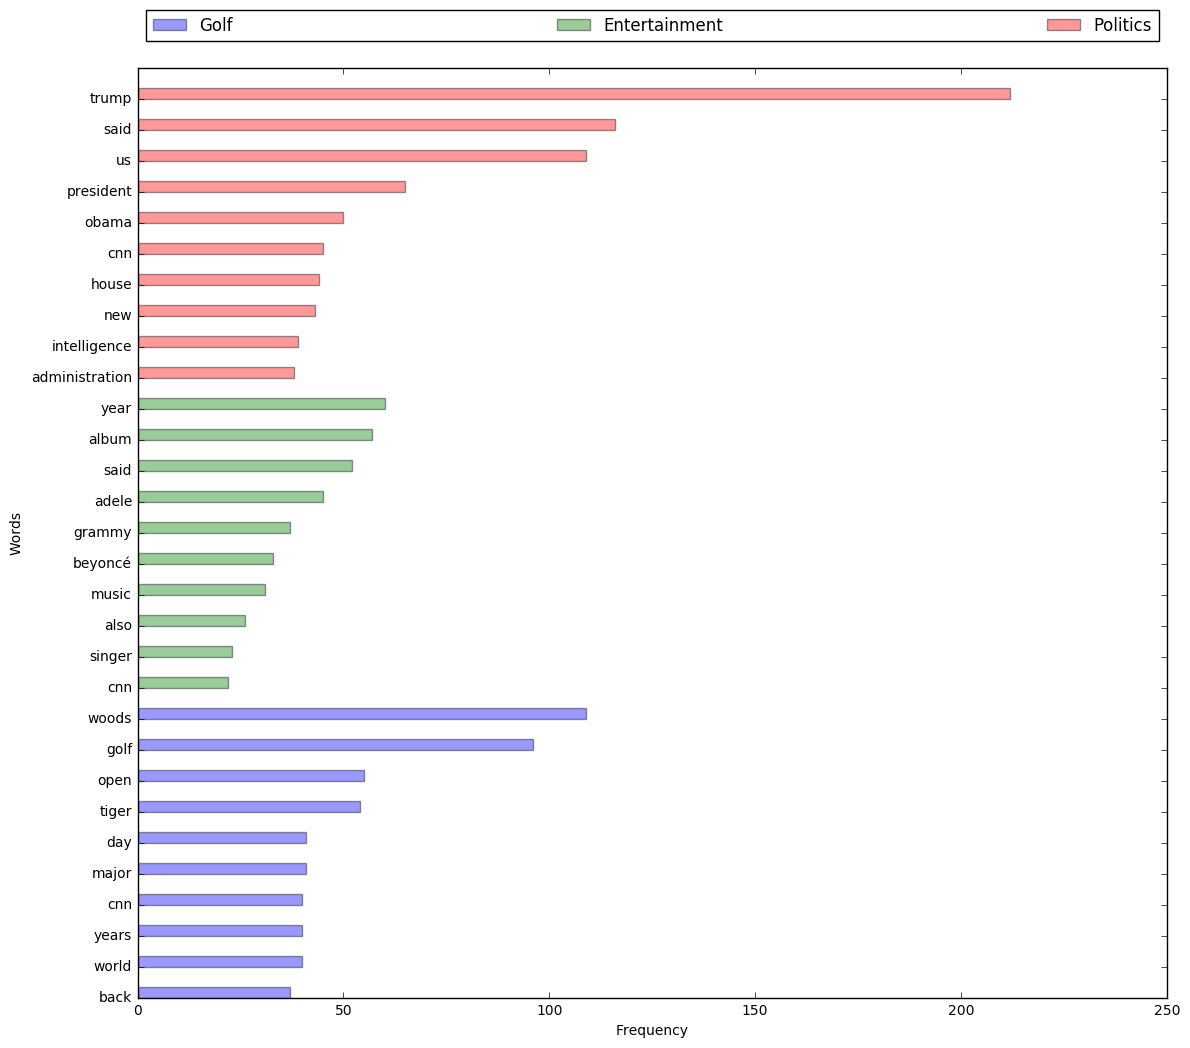

In [8]:
# Matplotlib bar chart

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

index = np.arange(30)

bar_width = 0.35

opacity = 0.4

rects1 = plt.barh(index[:10], golf_value, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Golf')

rects2 = plt.barh(index[10:20], entertainment_value, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Entertainment')

rects3 = plt.barh(index[20:], politics_value, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Politics')

plt.xlabel('Frequency')
plt.ylabel('Words')
plt.yticks(index, golf_label + entertainment_label + politics_label)
plt.legend(bbox_to_anchor=(0., 1.02, 1, .102), loc=4, ncol=3, mode="expand", borderaxespad=0.5)
plt.tight_layout()
plt.show()